##Gain Insight from the data:

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


Data_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews.csv")

In [208]:
Data_set.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


##Visualize the data: 



*   Here according to me 'content' and 'score' are the only two columns might help us..




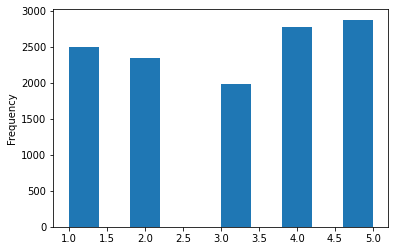

In [209]:
Data_set = Data_set[['content' , 'score']]
Data_set["score"].plot.hist()


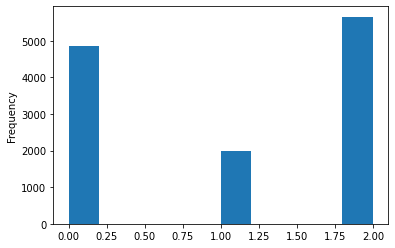

In [210]:
def score_apply(x):
  if (x <= 2):
    x = 0
  elif (x == 3):
    x=1
  else:
    x=2
  return x
Data_set.score = Data_set.score.apply(score_apply)
Data_set["score"].plot.hist()


In [211]:
count = Data_set['score'].value_counts()
count


2    5654
0    4850
1    1991
Name: score, dtype: int64

In [212]:
Data_set.isna().sum()  

content    0
score      0
dtype: int64

###Because Here there is no NaN values will move forward

In [213]:
Data_set.describe()

,score
count,12495.000000
mean,1.064346
std,0.914649
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [214]:
Data_set.dtypes

content    object
score       int64
dtype: object

##Clean The Text

In [215]:
Data_set.content = Data_set.content.str.lower()
Data_set

,content,score
0,i cannot open the app anymore,0
1,i have been begging for a refund from this app...,0
2,very costly for the premium version (approx in...,0
3,"used to keep me organized, but all the 2020 up...",0
4,dan birthday oct 28,0
...,...,...
12490,"i really like the planner, it helps me achieve...",2
12491,😁****😁,2
12492,very useful apps. you must try it,2
12493,would pay for this if there were even more add...,2


In [216]:
def Text_Cleaning(temp):
  temp = re.sub(r'^https?:\/\/.*[\r\n]*', '', temp)
  temp = re.sub("[^a-zA-Z]+",' ',temp)
  temp = re.sub(' +',' ',temp)
  return temp
Data_set.content = Data_set.content.apply(Text_Cleaning)
Data_set

,content,score
0,i cannot open the app anymore,0
1,i have been begging for a refund from this app...,0
2,very costly for the premium version approx ind...,0
3,used to keep me organized but all the updates ...,0
4,dan birthday oct,0
...,...,...
12490,i really like the planner it helps me achieve ...,2
12491,,2
12492,very useful apps you must try it,2
12493,would pay for this if there were even more add...,2


##PreProcess The Text !!

In [217]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [218]:
from nltk import (word_tokenize,sent_tokenize)
def Tokenizer(x):
  x = word_tokenize(x)
  return x
Data_set.content = Data_set.content.apply(Tokenizer)

In [219]:
Data_set

,content,score
0,"[i, can, not, open, the, app, anymore]",0
1,"[i, have, been, begging, for, a, refund, from,...",0
2,"[very, costly, for, the, premium, version, app...",0
3,"[used, to, keep, me, organized, but, all, the,...",0
4,"[dan, birthday, oct]",0
...,...,...
12490,"[i, really, like, the, planner, it, helps, me,...",2
12491,[],2
12492,"[very, useful, apps, you, must, try, it]",2
12493,"[would, pay, for, this, if, there, were, even,...",2


In [220]:
sw_nltk = stopwords.words('english')

In [221]:
def Remove_Stopwords(x):
  x = [word for word in x if word not in sw_nltk]
  return x
Data_set.content = Data_set.content.apply(Remove_Stopwords)
Data_set

,content,score
0,"[open, app, anymore]",0
1,"[begging, refund, app, month, nobody, replying]",0
2,"[costly, premium, version, approx, indian, rup...",0
3,"[used, keep, organized, updates, made, mess, t...",0
4,"[dan, birthday, oct]",0
...,...,...
12490,"[really, like, planner, helps, achieve, tasks,...",2
12491,[],2
12492,"[useful, apps, must, try]",2
12493,"[would, pay, even, additions, updates, absolut...",2


In [222]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [223]:
def Stemming(x):
  return [porter.stem(y) for y in x]
 
Data_set.content = Data_set.content.apply(Stemming)
Data_set

,content,score
0,"[open, app, anymor]",0
1,"[beg, refund, app, month, nobodi, repli]",0
2,"[costli, premium, version, approx, indian, rup...",0
3,"[use, keep, organ, updat, made, mess, thing, c...",0
4,"[dan, birthday, oct]",0
...,...,...
12490,"[realli, like, planner, help, achiev, task, go...",2
12491,[],2
12492,"[use, app, must, tri]",2
12493,"[would, pay, even, addit, updat, absolut, love...",2


In [224]:
Data_set.content = Data_set.content.apply(lambda y: np.nan if len(y)==0 else y)
Data_set.dropna(subset=['content'], inplace=True)
Data_set

,content,score
0,"[open, app, anymor]",0
1,"[beg, refund, app, month, nobodi, repli]",0
2,"[costli, premium, version, approx, indian, rup...",0
3,"[use, keep, organ, updat, made, mess, thing, c...",0
4,"[dan, birthday, oct]",0
...,...,...
12489,"[ok, undestad, repeat, task, shedul]",2
12490,"[realli, like, planner, help, achiev, task, go...",2
12492,"[use, app, must, tri]",2
12493,"[would, pay, even, addit, updat, absolut, love...",2


##Feature engineering:

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Data_set.content.astype(str))
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaah', ..., 'zoom', 'zuk', 'zwyk'], dtype=object)

In [226]:
print(vectorizer.get_feature_names_out().shape)

(7423,)


In [227]:
X.shape

(12382, 7423)

##Choosing the model: 

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Data_set.score, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(9905, 7423) (2477, 7423) (9905,) (2477,)


##Train and Test the model: 

In [229]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,max_iter= 1000).fit(X_train , y_train)


##Evaluate the model:

In [230]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7895002523977789
0.7137666532095277
